# Uber Price Prediction

## Importing The Libraries

In [1]:
import numpy as np # numerical analysis
import pandas as pd # data manipulation
import matplotlib.pyplot as plt # visualisation-1
import seaborn as sns # visualisation-2
import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/uber-fares-dataset/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Data Cleaning And Feature Extraction

In [3]:
df.shape # check number of rows and columns

(200000, 9)

In [4]:
df_copy = df.copy() # create a copy of dataframe so that we won't lose original data

In [5]:
df_copy.isnull().sum() # checking for NaN values

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df_copy.info() # checking for datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [7]:
df_copy.describe() # distribution of the dataset

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [8]:
df_copy.drop(columns = {"Unnamed: 0","key"},inplace=True) # dropping irrelevant columns

In [9]:
df_copy.head() # checking the first 5 rows of the dataset

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
# Alright now lets extract date and time from the pickup_datetime column
df_copy['pickup_datetime']  = pd.to_datetime(df_copy['pickup_datetime'])

In [11]:
df_copy['year'] = df_copy['pickup_datetime'].dt.year # extracting year
df_copy['month'] = df_copy['pickup_datetime'].dt.month # extracting the month
df_copy['day'] = df_copy['pickup_datetime'].dt.day # extracting the day
df_copy['hour'] = df_copy['pickup_datetime'].dt.hour # extracting the hour
df_copy['minute'] = df_copy['pickup_datetime'].dt.minute  # extracting the minute

In [12]:
df_copy.head() # checking if changes have taken place

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


In [13]:
# above data is good for data analysis purpose but now lets drop pickup_datetime
df_copy.drop(columns = {"pickup_datetime"},inplace=True)

In [14]:
df_copy.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47


In [15]:
# to calculate distance b/w pickup and dropoff locations we will use haversine's formula
#Haversine Formula is Used To Calculate Distane B/w lat and long of two points
import math
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points
    on the Earth's surface specified in decimal degrees.

    Parameters:
    lat1, lon1 : Latitude and longitude of point 1 (in decimal degrees)
    lat2, lon2 : Latitude and longitude of point 2 (in decimal degrees)

    Returns:
    Distance in kilometers between the two points.
    """
    # Radius of the Earth in kilometers
    R = 6371.0

    # Convert degrees to radians
    lat1 = math.radians(lat1)
    lon1 = math.radians(lon1)
    lat2 = math.radians(lat2)
    lon2 = math.radians(lon2)

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    distance = R * c  # Distance in kilometers
    return distance

In [16]:
# applying haversine's formula to calculate the distance between the latitude and longitude
df_copy['distance'] = df_copy.apply(lambda row: haversine(row['pickup_latitude'], row['pickup_longitude'], row['dropoff_latitude'], row['dropoff_longitude']), axis=1)

In [17]:
df_copy.head() # checking the dataset

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19,52,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21,45,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8,22,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17,47,4.475450


In [18]:
df_copy = df_copy[(df_copy['fare_amount']>0) & (df_copy['distance']>0)]

In [19]:
df_copy.shape

(194347, 12)

In [20]:
df_copy.drop(columns = {"pickup_latitude","pickup_longitude","dropoff_latitude","dropoff_longitude"},inplace=True)

In [21]:
df_copy.head()

,fare_amount,passenger_count,year,month,day,hour,minute,distance
0,7.5,1,2015,5,7,19,52,1.683323
1,7.7,1,2009,7,17,20,4,2.457590
2,12.9,1,2009,8,24,21,45,5.036377
3,5.3,3,2009,6,26,8,22,1.661683
4,16.0,5,2014,8,28,17,47,4.475450


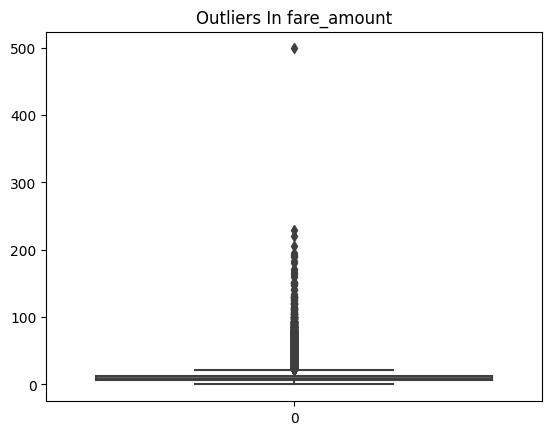

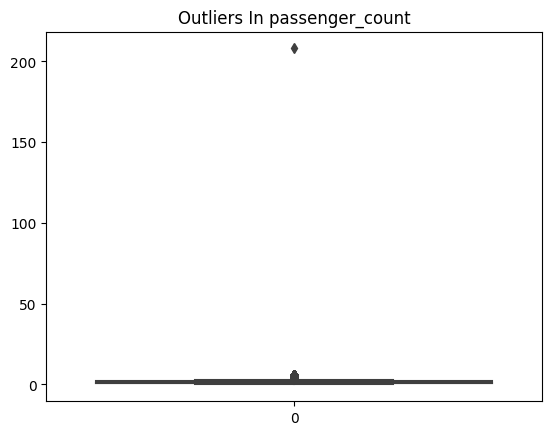

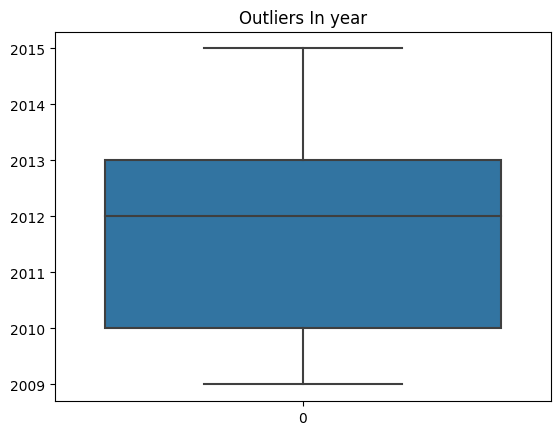

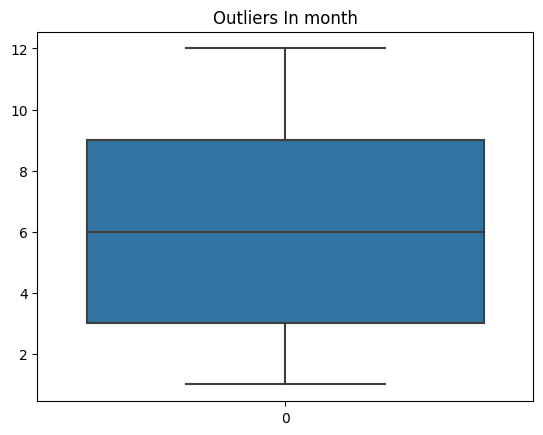

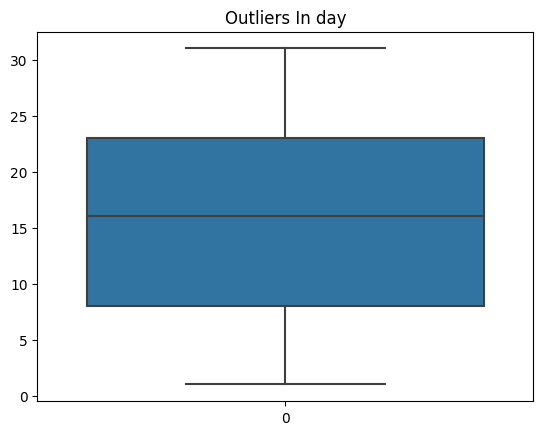

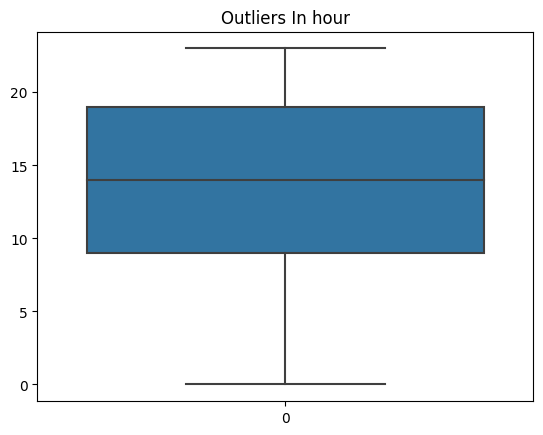

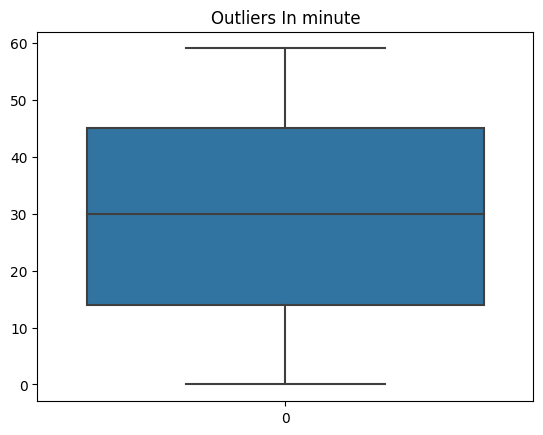

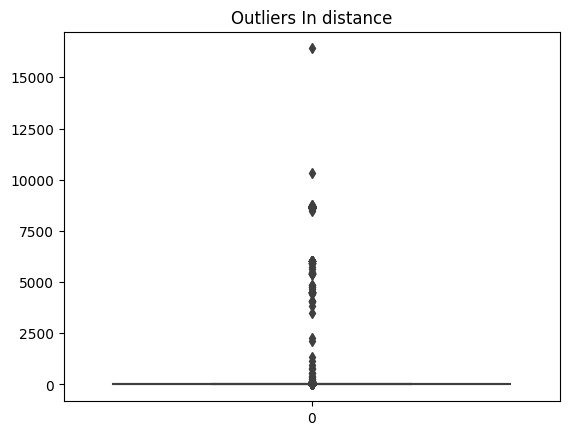

In [22]:
for column in df_copy.columns:
  sns.boxplot(df_copy[column])
  plt.title(f"Outliers In {column}")
  plt.show()

In [23]:
df_copy.head() #checking

,fare_amount,passenger_count,year,month,day,hour,minute,distance
0,7.5,1,2015,5,7,19,52,1.683323
1,7.7,1,2009,7,17,20,4,2.457590
2,12.9,1,2009,8,24,21,45,5.036377
3,5.3,3,2009,6,26,8,22,1.661683
4,16.0,5,2014,8,28,17,47,4.475450


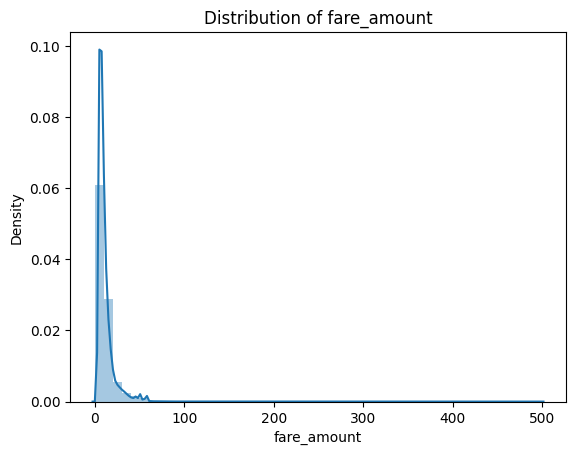

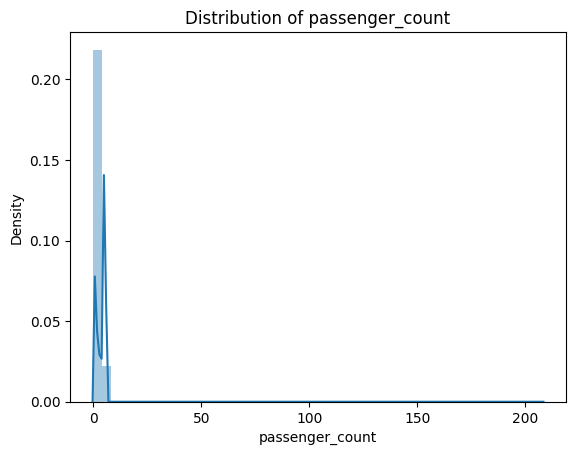

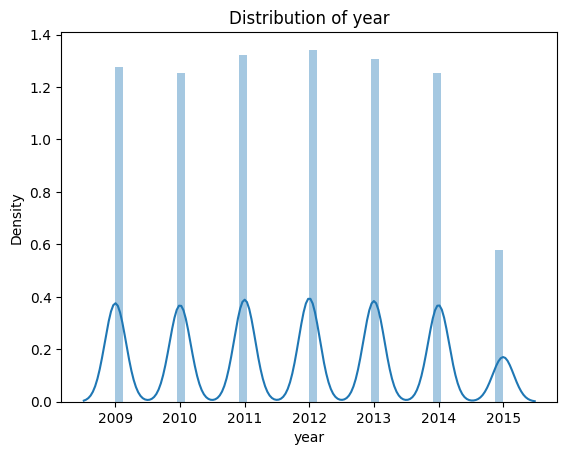

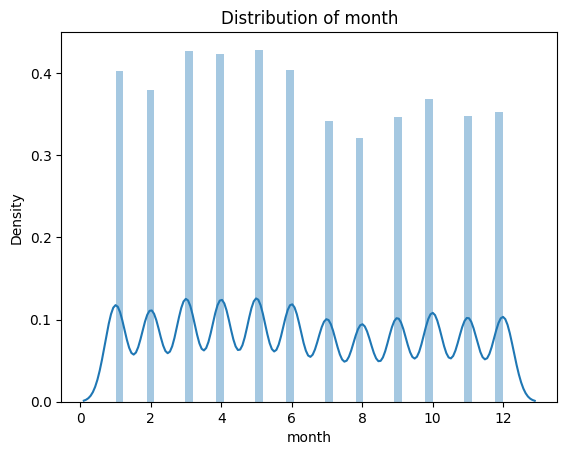

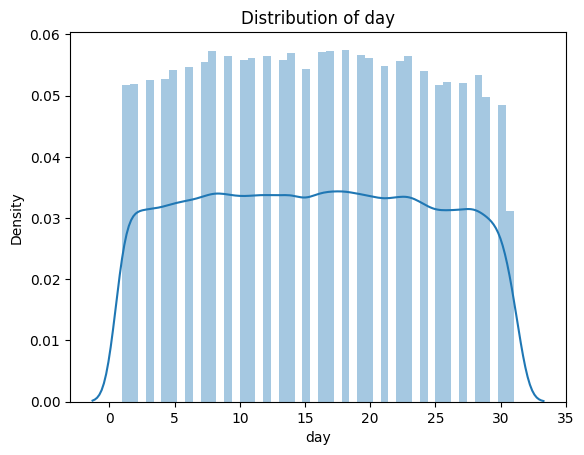

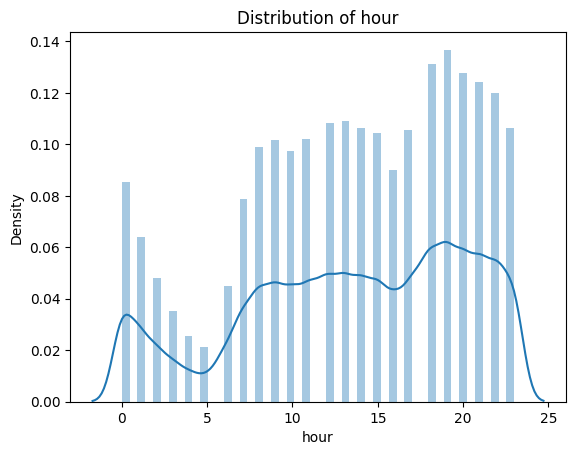

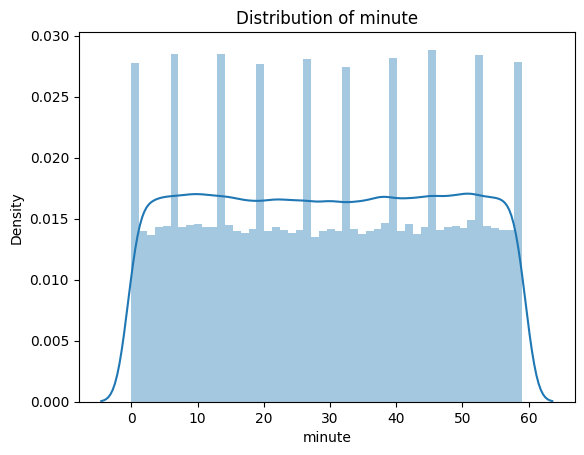

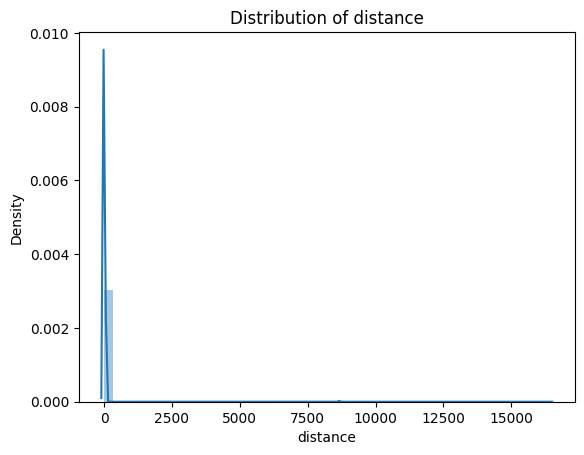

In [24]:
for column in df_copy.columns:
    sns.distplot(df_copy[column])
    plt.title(f"Distribution of {column}")
    plt.show()

In [25]:
'''
From the above graphs it can be observed that continuous values like fare_amount and distance
are heavily skewed to right
we need to apply log-transformation to convert them into normal distribution
'''

'\nFrom the above graphs it can be observed that continuous values like fare_amount and distance\nare heavily skewed to right\nwe need to apply log-transformation to convert them into normal distribution\n'

In [26]:
# creating some interaction features like fare_per_km , fare_per_passengers
# Assuming df_copy is your DataFrame
df_copy['fare_per_km'] = df_copy['fare_amount'] / (df_copy['distance'] + 1e-3)  # avoid division by 0
df_copy['fare_per_passenger'] = df_copy['fare_amount'] / (df_copy['passenger_count'] + 1e-3)

# Applying log transformation to the features fare_amount and distance
df_copy['fare_amount'] = np.log1p(df_copy['fare_amount'])
df_copy['distance'] = np.log1p(df_copy['distance'])


<Axes: >

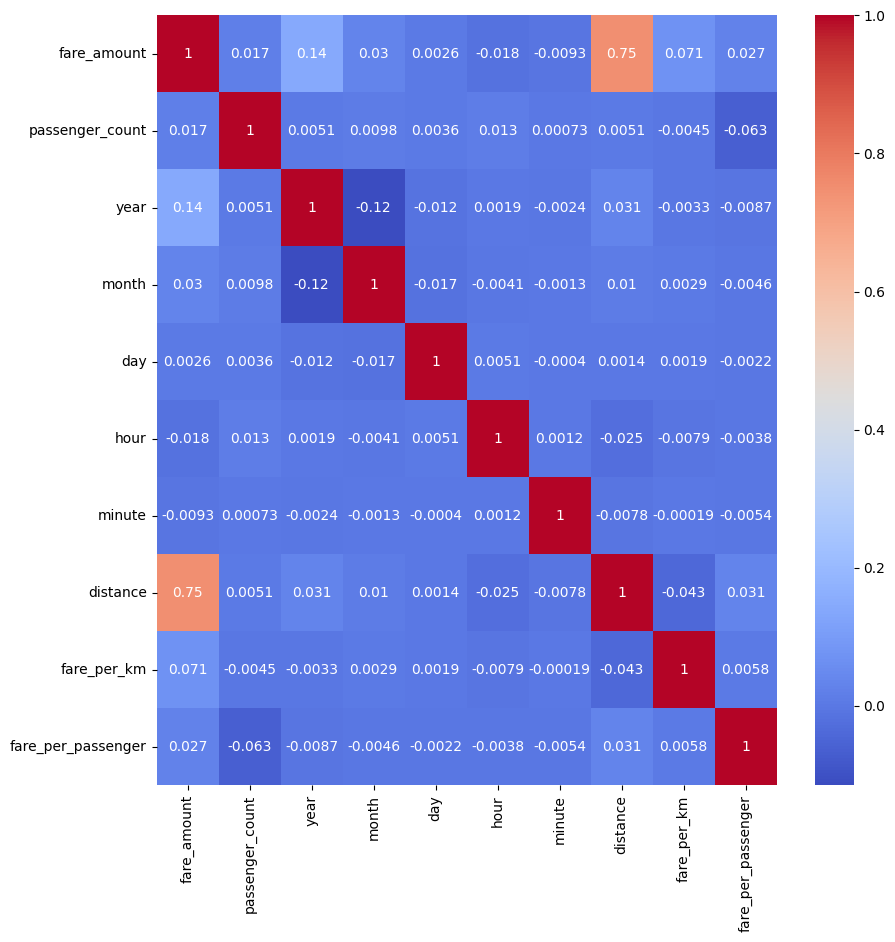

In [27]:
# checking the correlation with each variable
plt.figure(figsize=(10,10))
sns.heatmap(df_copy.corr(),annot=True,cmap='coolwarm')

In [28]:
# dropping the unnecessary columns
df_copy.drop(columns = {"minute","hour","day","year","month"},inplace=True)

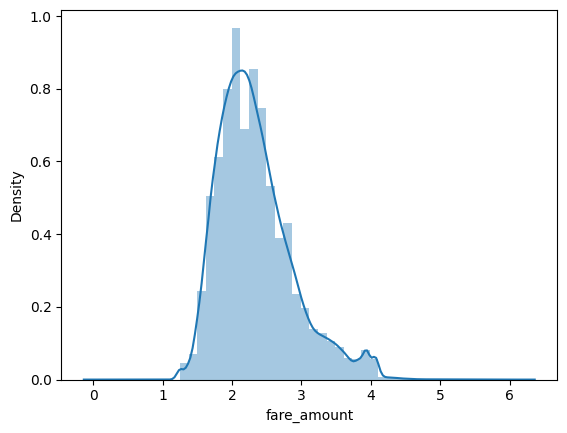

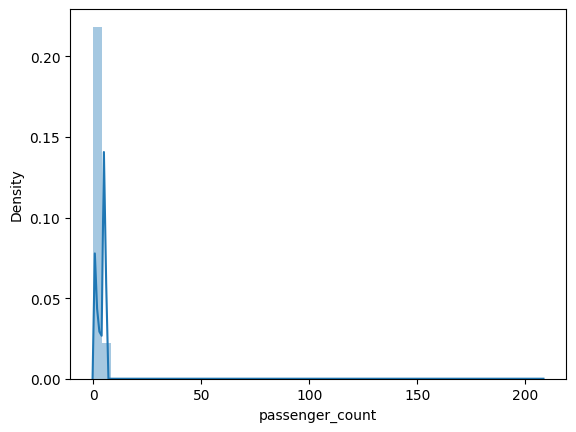

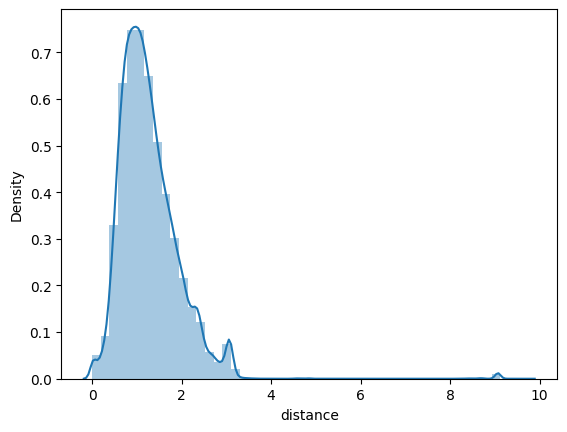

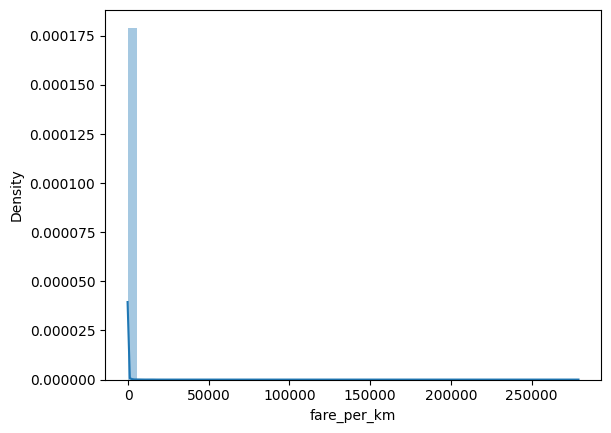

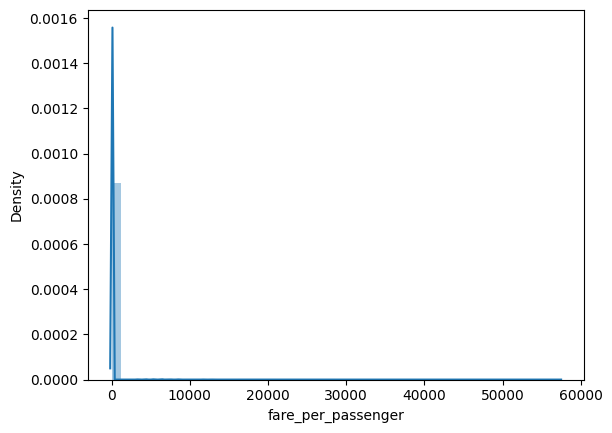

In [29]:
for columns in df_copy.columns:
  sns.distplot(df_copy[columns])
  plt.show()

In [30]:
df_copy.skew()

fare_amount             0.983906
passenger_count        18.529502
distance                3.425713
fare_per_km           116.685674
fare_per_passenger     31.683159
dtype: float64

In [31]:
df_copy.isnull().sum()

fare_amount           0
passenger_count       0
distance              0
fare_per_km           0
fare_per_passenger    0
dtype: int64

In [32]:
# removing zero and inf values from the dataset
df_copy = df_copy[(df_copy['fare_amount'] > 0) & (df_copy['fare_amount'] < np.inf)]
df_copy = df_copy[(df_copy['distance'] > 0) & (df_copy['distance'] < np.inf)]

In [33]:
df_copy.shape

(194347, 5)

In [34]:
df_copy.skew()

fare_amount             0.983906
passenger_count        18.529502
distance                3.425713
fare_per_km           116.685674
fare_per_passenger     31.683159
dtype: float64

In [35]:
# normalising fare_per_km and fare_per_passenger too
df_copy['fare_per_km'] = np.log1p(df_copy['fare_per_km'])
df_copy['fare_per_passenger'] = np.log1p(df_copy['fare_per_passenger'])

In [36]:
df_copy.skew()

fare_amount            0.983906
passenger_count       18.529502
distance               3.425713
fare_per_km            6.472581
fare_per_passenger     2.499156
dtype: float64

# Model Trainning 

In [37]:
# separating into train and test data
from sklearn.model_selection import train_test_split
X = df_copy.drop(columns = {"fare_amount"})
y = df_copy['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
# trainning XGBoost Model
from xgboost import XGBRegressor
rf = XGBRegressor(n_estimators=70, learning_rate=1.5, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=1.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=70, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
y_pred = rf.predict(X_test)

In [40]:
# Actual Vs Predicted
actpred = pd.DataFrame({'Actual': y_test,
                       'Predicted':y_pred})
actpred

,Actual,Predicted
198861,2.970414,2.941820
129617,1.840550,1.844167
83855,1.774952,1.787932
193605,2.014903,2.009288
94557,3.030134,3.006335
...,...,...
175016,1.458615,1.413455
130258,2.674149,2.622206
152314,2.564949,2.563672
51383,2.660260,2.710397


Text(0, 0.5, 'Predicted')

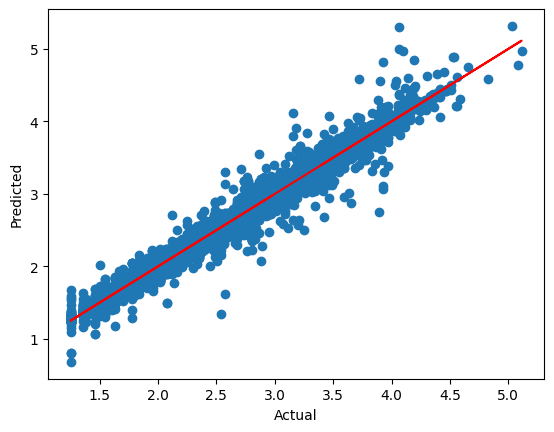

In [41]:
#actual vs predicted
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [42]:
from sklearn.metrics import r2_score
print("R2-Score:",r2_score(y_test,y_pred))

R2-Score: 0.9903089337007167


In [43]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.0028951642636255194


In [44]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 0.029050905168048157


In [45]:
print("Root Mean Squared Error:",np.sqrt(mse))

Root Mean Squared Error: 0.05380673065356712


In [46]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
import numpy as np
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", np.sqrt(-grid_search.best_score_))
best_xgb = grid_search.best_estimator_


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 1, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
Best RMSE: 0.016715558455799317


In [47]:
# K-Fold Cross Validation
from sklearn.model_selection import KFold,cross_val_score
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

results = cross_val_score(best_xgb, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-results)

print("Cross-validated RMSE scores:", rmse_scores)
print("Mean RMSE:", np.mean(rmse_scores))
print("Standard Deviation:", np.std(rmse_scores))

Cross-validated RMSE scores: [0.01410244 0.01493204 0.01704855 0.02492687 0.01962043 0.01378496
 0.01512685 0.01541783 0.02517102 0.01140073]
Mean RMSE: 0.01715317121963112
Standard Deviation: 0.004434047303707417


# Metrics

In [48]:
# Observation : 
print("Model:  XGBRegressor")
print("R2-Score:",r2_score(y_test,y_pred))
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:",np.sqrt(mse))
print("Mean Cross Validation (10 Fold):", np.mean(rmse_scores))

Model:  XGBRegressor
R2-Score: 0.9903089337007167
Mean Squared Error: 0.0028951642636255194
Mean Absolute Error: 0.029050905168048157
Root Mean Squared Error: 0.05380673065356712
Mean Cross Validation (10 Fold): 0.01715317121963112
